In [96]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/home/kim/Desktop/AI_cours/data/copy.png'

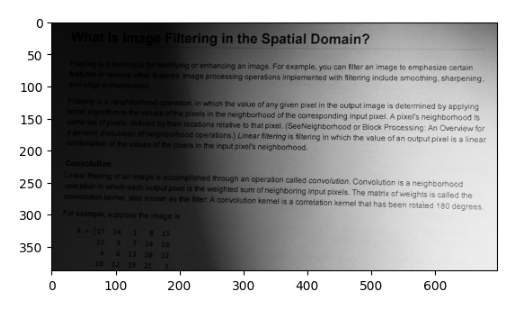

In [97]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

50.0


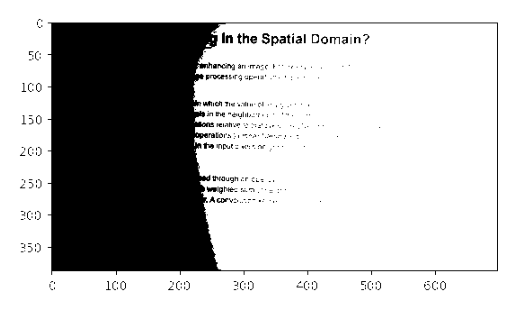

In [98]:
result, binary = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)
print(result)
plt.imshow(binary,cmap='gray')
plt.axis('off')
plt.show()

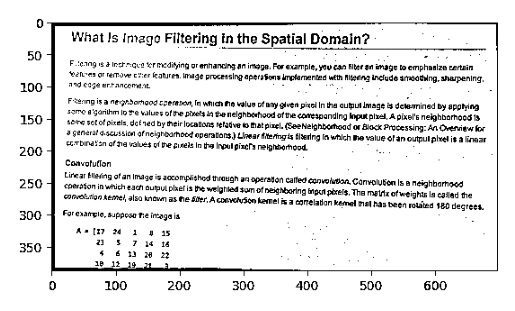

In [99]:
# 적응형 이진화
# 영역 (region)마다 다른 임계값 사용하겠다는 의미
# (cf) 일반적으로 이진화라 하면 동일 기준 사용

_ = cv2.adaptiveThreshold(
    gray, # 적용할 이미지
    255, # 최댓값
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # 옵션 주변 픽셀의 가중평균(가우시안)
    cv2.THRESH_BINARY, # 주어진 조건(threshold 임계치)에 맞으면 결과를 이렇게 해줘
    11, # 커널 크기
    4 # 상수
)
# (11x11) 커널 가져와요, 주변 픽셀 값 가져와요
# (옵션) cv2.ADAPTIVE_THRESH_GAUSSIAN_C 활용, 주변 픽셀에 가우시안 평균(가중평균) 적용, 평균 계산
# 여기서 나온 평균값에서 상수 (4)를 뺀 값ㅇ르 threshold T로 사용
# 픽셀 값이 T 보다 크면 

plt.imshow(_,cmap='gray')
plt.axis('off')
plt.show()


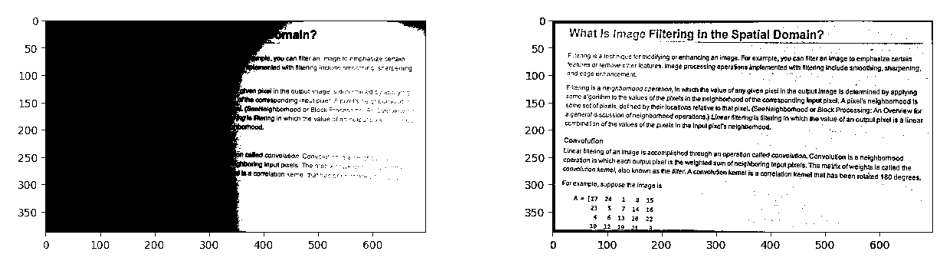

In [100]:
ret, binary_global = cv2.threshold(gray, 127,255,cv2.THRESH_BINARY)
binary_ad = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 4)
fig, axes = plt.subplots(1,2,figsize=(12,24))
axes[0].imshow(binary_global,cmap='gray')
axes[0].axis('off')
axes[1].imshow(binary_ad,cmap='gray')
axes[1].axis('off')
plt.show()

엣지 검출

In [101]:
# sobel filter
# 1차 미분, slope(gradient)
# 영상의 밝기 변화량(gradient) 계산 >> 물체 윤곽선, 경계 추출하는 필터
# 밝기가 급격하게 변하네 >> edge (vs) 변화가 없네 >> 배경이네
# >> 경계의 방향과 강도 계산

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

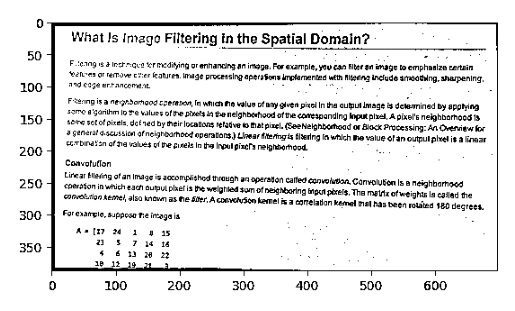

In [102]:
plt.imshow(binary_ad,cmap='gray')
plt.axis('off')
plt.show()

In [103]:
# sobel filter 적용,
# 1, 0 >> 수평 엣지, 0, 1 >> 수직 엣지

gx = cv2.Sobel(binary_ad, cv2.CV_32F,1,0,ksize=3) # dx=1, dy=0 x축 방향 미분(수직 엣지 검출)
gy = cv2.Sobel(binary_ad, cv2.CV_32F,0,1,ksize=3) # dx=0, dy=1 y축 방향 미분(수평 엣지 검출)

# CV_32Fsms 32비트 실수(음수 포함 정밀한 계산)
# gx(x방향) 가로 변화 감지 >> 세로선 찾기



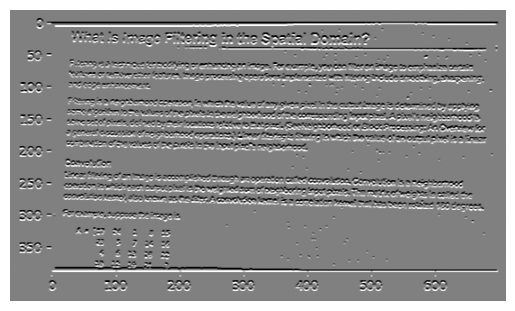

In [104]:
plt.imshow(gy,cmap='gray')
plt.axis('off')
plt.show()

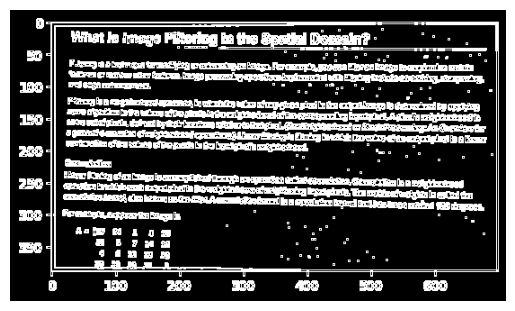

In [105]:
mag = cv2.magnitude(gx,gy) # mag = sqrt(gx**2 + gy**2) + L2규제 즉 두 벡터 합의 크기
mag = np.uint8(np.clip(mag,0,255))

# gx(x방향 기울기, 밝기 변화량), gy(y방향 기울기)

plt.imshow(mag,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# [정리 시간]
# 1. cv2.moments >> moments: 이미지에서 중심 어디지? (정말로 모멘트를 구하는 것, 1차 모멘트, 2차 모멘트 등)
# 2. addWeighted: 두 이미지 가중치로 합치는 함수 >> dst = w1*img1 + w2*img2 + gamma
# 배경 위에 반투명, 한 레이어(UI) 올리거나 두 영상을 특징 결합 시 사용
# 3. magnitude (벡터의 크기)
# >> 엣지(경계선) 검출, optical flow(광학 흐름)에 자주 사용
# >> 변화의 세기
# >> 각 pixel 위치 확인 >> x방향 변화량 + y방향 변화량 합쳐서 '얼마나 강한 경계선 (엣지) 인가?


In [ ]:
# binary_ad
# 어디까지 전처리한거야?
# 1) 이미지 불러와서 이진화(흑백 변환)
# 2) 적응형 임계값(threshold) 처리
# 여기까지 전처리 한 이미지(입력값)로 canny 엣지 검출

# ksize와 blocksize 차이
# ksize: 필터, 마스크의 크기

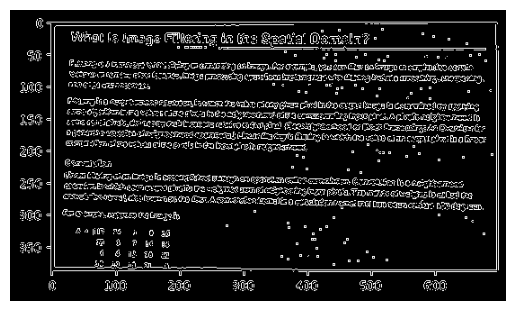

In [107]:
result = cv2.Canny(binary_ad,
                   50, # 낮은 임계값(약한 엣지)
                   150) # 높은 임계값(강한 엣지)
plt.imshow(result,cmap='gray')
plt.axis('off')
plt.show()

Canny filter 동작방식


1. 노이즈 제거(Gaussian Blur)
2. 그래디언트 계산(Sobel Filter)
3. 비최대 억제(Non-Maximum Suppression) : 엣지의 방향을 따라 로컬의 최댓값만 남기고 나머지는 억제
4. 이중 임계값 처리(Double Thresholding) : 강한 엣지, 약한 엣지를 파악하여 약한 엣지는 강한 엣지와 연결되었을 때만 보존
5. 강한 엣지와 연결되지 않은 약한 엣지는 제거


코너(모서리) 검출 알고리즘

- 해리스코너(코너) 알고리즘
- 시-토마스 알고리즘

(np.float64(-0.5), np.float64(551.5), np.float64(323.5), np.float64(-0.5))

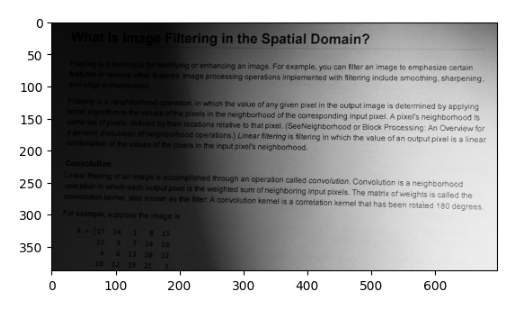

In [108]:
plt.imshow(gray,cmap='gray')
plt.axis('off')

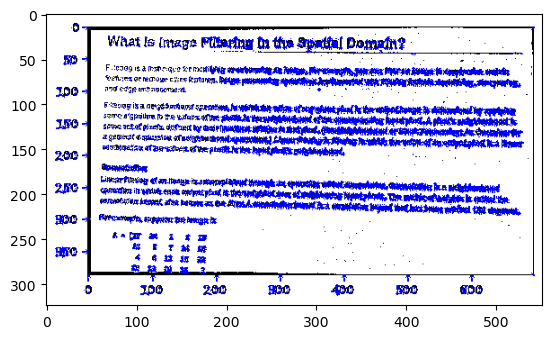

In [109]:
# 윈도우를 모든 방향으로 움직였을때 픽셀 값의 변화가 가장 큰 지점을 코너로 생각함

harris = cv2.cornerHarris(np.float32(gray),blockSize=2,ksize=3, k=0.04) # 미분 계산, k는 민감도 점수맵 반환
# 모서리 찾기
# 코너랑 두 방향으로 모두 강한 밝기 변화량이 존재하는 곳 (특징점 추출)
# 코너 (선과 선이 교차하는 곳) 저기가 코너일 가능성이 얼마나 높지?
# 점수(score)맵(map)
# score가 높으면 코너일 가능성이 높다

# np.float32(gray) : gradient 계산(미분) uint8 >> float32
# blocksize=2 (2x2)주변 영역 감시
# >> 코너 점(point) 계산할 때 고려하는 주변 영역 크기
# ksize sobel filter 커널 사이즈 기울기 계산
# k=0.04 민감도(threshold 임계치) 조절(0.04~0.06)
# 클수록 더 민감하게 반응 >> 코너가 더 많이 검출

# 정규화
# 검출 결과를 0~255 범위로 정규화 (uint8)
# >> 해리스 검출 결과가 점수 맵이기 때문에
# 값 범위가 너무 크거나 음수가 될 수 있기 때문에 0~255로 압축 표현
# cv2.normalize
harris_norm = cv2.normalize(harris,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
# harris_norm = (harris-min(harris)) / (max(harris) - min(harris)) * 255

corner = cv2.cvtColor(binary_ad, cv2.COLOR_BGR2RGB) # 1채널 --> 3채널(다 같은 값이 들어감)

corner[harris>0.9*harris_norm.max()] = (0,0,255)

plt.imshow(corner)
plt.show()


(np.float64(-0.5), np.float64(551.5), np.float64(323.5), np.float64(-0.5))

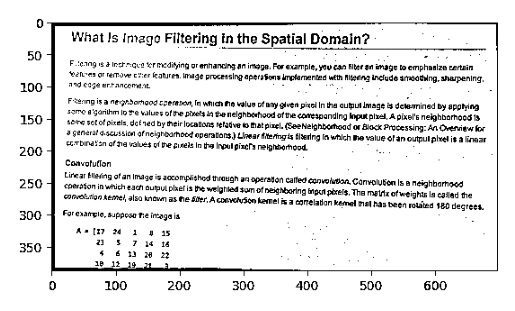

In [110]:
plt.imshow(binary_ad,cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(551.5), np.float64(323.5), np.float64(-0.5))

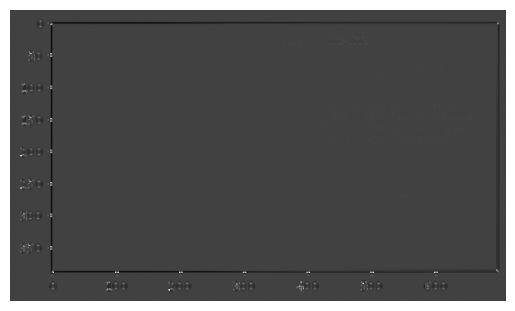

In [111]:
plt.imshow(harris_norm,cmap='gray')
plt.axis('off')

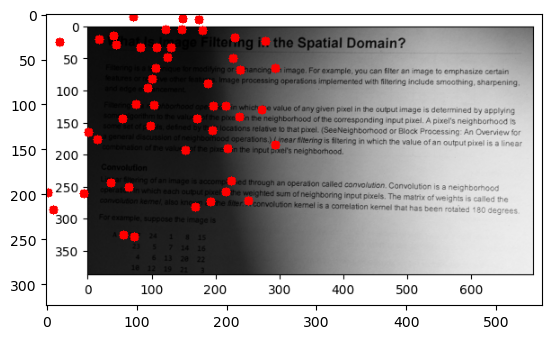

In [113]:
src = cv2.imread(image_path)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 알고리즘 적용 : goodFeaturesToTrack
# - 실무용
# - 해리스 코너는 점수맵 사용자가 직접 임계치 설정
# - goodFeatures는 해리스코너 점수 계산한 뒤, 점수 정령, 임계치 필터링, 거리 필터링까지 자동화
pts = cv2.goodFeaturesToTrack( # 점을 뽑아줌
    binary_ad,
    maxCorners=50,
    qualityLevel=0.01,
    minDistance=10
)

if pts is not None:
    pts = pts.astype(np.uint8)
    for i in pts:
        x, y = i.ravel()
        cv2.circle(src, (x,y), 5, (0,0,255),-1)
# 시각화 할 때 BGR >> RGB 변환

plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

In [41]:
pts

array([[[ 45,  50]],

       [[ 45,  86]],

       [[ 45, 122]],

       [[ 45, 157]],

       [[176,  55]],

       [[ 11, 198]],

       [[ 11, 162]],

       [[ 45, 193]],

       [[ 45, 228]],

       [[ 45,   8]],

       [[118,  35]],

       [[ 67,  46]],

       [[189,  35]],

       [[109,  54]],

       [[ 15, 126]],

       [[ 15,  90]],

       [[ 30,  15]],

       [[219,  36]],

       [[148,  36]],

       [[ 77,  36]],

       [[  6,  36]],

       [[ 48,  36]],

       [[ 44,  17]],

       [[ 20,   5]],

       [[ 21, 190]],

       [[208,  53]],

       [[ 47,  48]],

       [[ 33,  13]],

       [[135,  47]],

       [[ 21,  48]],

       [[ 28,  32]],

       [[217,  48]],

       [[117,  48]],

       [[ 23,  84]],

       [[252,  48]],

       [[ 15, 226]],

       [[153,  53]],

       [[ 82,  53]],

       [[ 11,  53]],

       [[196,  53]],

       [[ 30,  11]],

       [[ 30, 231]],

       [[ 31, 196]],

       [[ 31, 160]],

       [[ 31,  54]],

       [[ 

허브 변환(Tough Transform)
- 직선 검출 가능
- 원 검출 가능

In [114]:
path = '/home/kim/Desktop/AI_cours/data/water_coins.jpg'

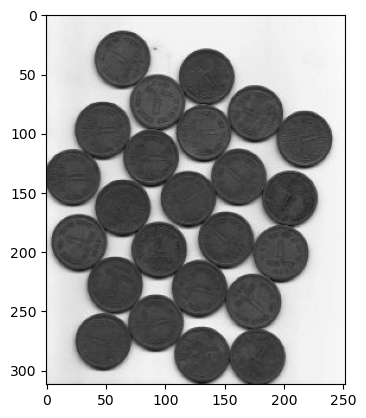

In [115]:
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

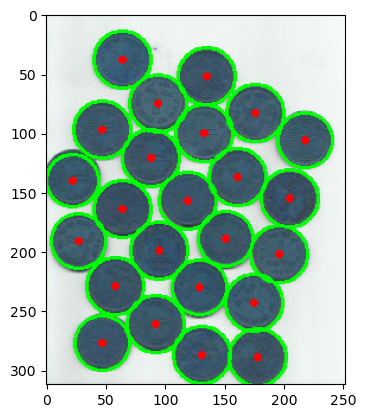

In [116]:
# 원 검출
circles =\
cv2.HoughCircles(gray,                  # gray
                 cv2.HOUGH_GRADIENT,    # 기울기 사용 원을 찾겠다.
                 dp=1.2,                # 해상도 scaling 비율, 1.0 입력 이미지와 같은 해상도
                 minDist=30,            # 검출된 원(중심) 사이 최소 거리 >> 원 중심 간 간격이 30이상 >> 중복이 아니다
                 param1=100,            # 높은 임계값(canny edge upper threshold)
                 param2=30,             # 투표(voting) 누적된 임계값(원이라고 판단할 기준)
                 minRadius=10,          # 최소 반지름
                 maxRadius=50           # 최대 반지름
                 )

# 투표 많은 점들이 원을 지지하면 원으로 인정
if circles is not None:
    circle_pts = np.around(circles).astype(np.uint16)
    for (x,y,r) in circle_pts[0]:
        # 원 그림에서 배열의 첫번째 차원 무시
        # circles.shape 3차원 배열 (1,N,3) >> 무시하면 2차언
        # 세번째 차원(3) 3가지 정보(x,y,r)
        cv2.circle(image,(x,y),r,(0,255,0),2)
        cv2.circle(image,(x,y),2,(255,0,0),2)

plt.imshow(image)

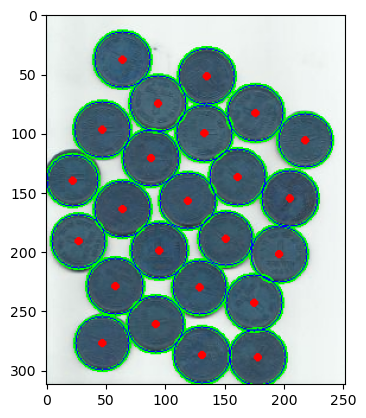

In [117]:
if circles is not None:
    for circle_pt in circle_pts[0]:
        cv2.circle(image,(int(circle_pt[0]),int(circle_pt[1])),circle_pt[2],(0,0,255))

plt.imshow(image)

In [118]:
circle_pt[0],circle_pt[1]

(np.uint16(119), np.uint16(157))

In [ ]:
# minDist=30,
# 검출된 원(중심) 사이 최소거리
# >> 원 중심간 간격이 30 이상 >> 중복 아니다
# >> 목적: 과잉 검출 방지
# 30 pixel 거리 이내 다른 원의 중심을 허용 하지 않겠다.
# 즉, 하나의 원에 대한 하나의 검출 결과만 보장한다
# 값이 작으면 서로 가까운 원들을 개별적인 원으로 검출 >> 비슷한 원 여러개가 잡힘
# 값이 크면 원이 너무 멀리 떨어진 경우에만 검출




# param2 = 30,         # 투표(voting) 누적 임계값(원의로 판단할 기준)
# 값이 높으면 (누가봐도) 원이야 하는 확실한 원만 검출
# 값이 낮으면 (아닌거 같은데) 약한 원도 검출


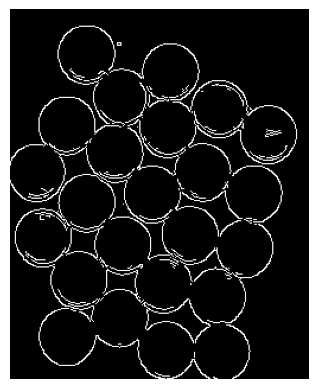

In [119]:
edge = cv2.Canny(gray,50,150)
plt.imshow(edge,cmap='gray')
plt.axis('off')
plt.show()

ρ = x*cos (θ) + y*sin (θ)

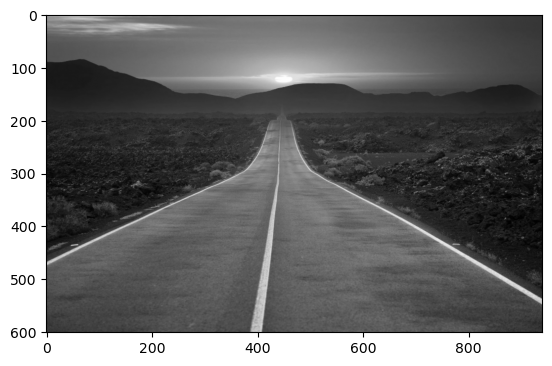

In [120]:
# 이미지 edge(경계) 에서 직선(line)들을 자동 검출하는 알고리즘
# >> 실제 길이 선분 형태로 반환(실무)
# >> 시작점(x1, y1)과 끝점(x2,y2) 좌표로 이루어진 배열 출력


# cf.  cv2.HoughLines 무한 직선 형태
# HoughLinesP : P (probability) 확률
path = "/home/kim/Desktop/AI_cours/data/lines.png"
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [121]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50,150)

lines = cv2.HoughLinesP(
    edges, # 캐니 엣지로 검출된 멧지 이미지
    rho=1, # 해상도
    theta=np.pi/180, # 해상도(각도)
    threshold=100, # 직선으로 간주될 수 있는 최소값
    minLineLength=100, # 내가 검출하려고 하는 직선의 최소 길이
    maxLineGap=10 # 직선으로 간주되는 간격
)



In [82]:
print(lines)

[[[ 56   2 939   2]]

 [[676 390 939 548]]

 [[669 382 939 537]]

 [[ 40 261 242 261]]

 [[511 264 726 260]]

 [[ 44 452 383 294]]

 [[778 262 927 264]]

 [[801 278 903 281]]

 [[ 55 312 185 308]]

 [[258 290 359 287]]

 [[520 302 644 317]]

 [[768 260 935 263]]

 [[642 293 765 297]]

 [[804 258 906 256]]

 [[658 330 778 347]]

 [[730 291 841 285]]

 [[509 261 609 258]]

 [[ 19 322 181 314]]

 [[804 276 914 276]]

 [[605 294 802 300]]

 [[742 337 899 356]]

 [[  0 468 210 370]]

 [[586 318 691 325]]

 [[716 280 838 282]]

 [[654 283 785 290]]

 [[735 282 840 284]]

 [[688 392 938 536]]

 [[556 310 671 322]]

 [[222 254 340 254]]

 [[594 290 700 293]]

 [[665 285 774 293]]

 [[686 314 892 335]]

 [[719 259 848 259]]

 [[516 245 616 238]]

 [[824 277 937 281]]

 [[826 249 939 245]]

 [[705 347 819 365]]

 [[543 111 652 110]]

 [[415 550 439 327]]

 [[387 600 442 288]]

 [[521 307 674 385]]

 [[165 378 285 330]]

 [[650 376 758 440]]

 [[ 74 432 323 321]]

 [[152 386 260 343]]

 [[ 83 433

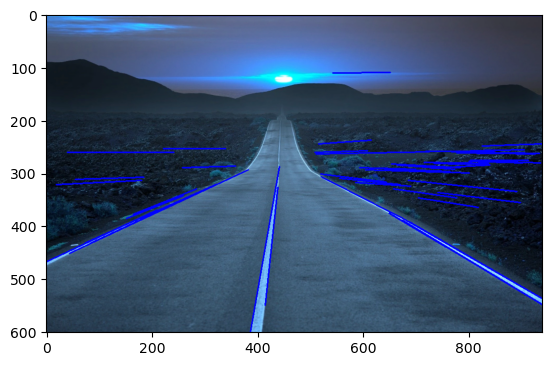

In [122]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(image)

In [ ]:
# rho : 원점(0,0)에서 직선까지 거리 (1px 단위로 매우 정밀하게 계산한다)
# theta : 각도 단위(radian)
# >> np.pi/180 = 1도(degree)
# >> 각도 resolution이 크면,직선 검출 정확도 떨어짐
# threshold=100, # 직선으로 간주될 수 있는 최소값(최소 투표수 100)
# >> 누적 투표수가 100 이상 되어야 선이라고 간주
# >> 높이면 확실한 직선만 검출 (노이즈 적어져요), 낮추면 작은 선들도 다 검출
# minLineLength=10,  # 내가 검출하려는 직선의 최소 길이(길이가 10 px 미만 >> 무시)
# maxLineGap=10)     # 직선으로 간주되는 간격(직선 간격 허용)
# >> 중간에 끊어져 있는 선이 있어요. 선들 간의 사이가 10이하면 연결된 하나의 선으로 간주

컨투어(contour, 윤곽선) 검출

In [123]:
path = '/home/kim/Desktop/AI_cours/data/water_coins.jpg'
image = cv2.imread(path)

OTSU : 자동으로 최적 임계값 찾기
- grayscale image >> 이진화 하는 코드
- 히스토그램(픽셀 값 분포) 자동으로 분석 >> 최적의 임계값( threshold) >> 이미지 내부에서 흑(0), 백(255) 나눠줘요
- 문서 스캔, OCR  


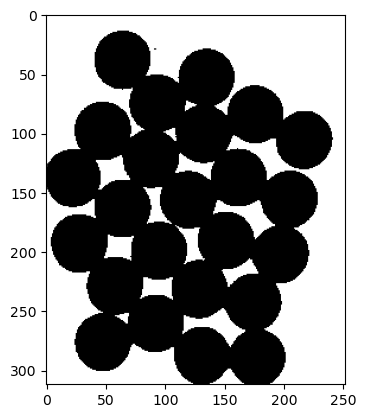

In [124]:
# 흑백 >> 임계값으로 컨투어(윤곽선) 검출

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# 임계값 적용
result, binary = cv2.threshold(gray,0,255,cv2.THRESH_OTSU) # THRESH_OTSU 자동으로 threshold 값 정함
# result: threshold 값

plt.imshow(binary,cmap='gray')

In [125]:
# 컨투어 검출
# cv2.RET

cons = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# binary : 임계값 적용해서 나온 이진화된 이미지
# RETR_LIST : retrieve list 목록을 검색하다. (모든 윤곽선 검색해)
# CHAIN_APPROX_NONE : 모든 점 저장
# 흰색(255) 영역의 경계선 찾아요 >> 리스트 형식으로 변환

con_packs = cons[0] if len(cons) == 2 else cons[1]

- openCV 3.X : (contours, hierachy) (윤곽선 리스트, 계층정보)
- openCV 4.X : (contours) 


cv2.RETR_LIST
- 윤곽선 검색 방식(contour retrieval mode)
  - RETR_LIST : 모든 윤곽선 찾아서 리스트로 반환
  - RETR_EXTERNAL : 가장 바깥 윤곽선만
  - RETR_TREE : 윤곽선 계층구조까지 (부모-자식)
  - RETR_CCOMP : 2단계 계층구조까지


- cv2.CHAIN_APPROX_NONE
  - 윤곽선의 모든 점을 전부 저장
- cv2.CHAIN_APPROX_SIMPLE
  - 꼭 필요한 점(시작점, 끝점)만 저장


In [ ]:
cons[:1][0]

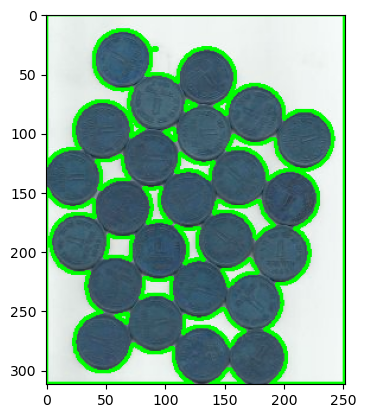

In [126]:
# 시각화
_ = cv2.drawContours(image,con_packs,-1,(0,255,0),2)
# -1 모든 윤곽선 그려줘
plt.imshow(_)